In [1]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt

In [2]:
import os
cwd = os.getcwd()
print(cwd)

c:\Users\YWANG\cpfl-python\fets_2022\Challenge\Task_1


In [3]:
partition_1_path = os.path.join(cwd,'openfl-workspace','fets_challenge_workspace','partitioning_1.csv')
partition_2_path = os.path.join(cwd,'openfl-workspace','fets_challenge_workspace','partitioning_2.csv')
print(partition_1_path)
print(partition_2_path)

c:\Users\YWANG\cpfl-python\fets_2022\Challenge\Task_1\openfl-workspace\fets_challenge_workspace\partitioning_1.csv
c:\Users\YWANG\cpfl-python\fets_2022\Challenge\Task_1\openfl-workspace\fets_challenge_workspace\partitioning_2.csv


In [4]:
df_1 = pd.read_csv(partition_1_path)
df_2 = pd.read_csv(partition_2_path)
num_samples_1 = len(df_1['Partition_ID'])
num_cols_1 = df_1['Partition_ID'][num_samples_1-1]
num_samples_2 = len(df_2['Partition_ID'])
num_cols_2 = df_2['Partition_ID'][num_samples_2-1]
print('Partition_1: {} collaborators have {} data samples'.format(num_cols_1,num_samples_1))
print('Partition_2: {} collaborators have {} data samples'.format(num_cols_2,num_samples_2))

Partition_1: 23 collaborators have 1251 data samples
Partition_2: 33 collaborators have 1251 data samples


In [5]:
all_cols_1 = ['col_'+str(i) for i in range(num_cols_1)]
all_cols_2 = ['col_'+str(i) for i in range(num_cols_2)]

In [6]:
num_cols_2

33

[511.   6.  15.  47.  22.  34.  12.   8.   4.   8.  14.  11.  35.   6.
  13.  30.   9. 382.   4.  33.  35.   7.   5.]
[170. 170. 171.   6.  15.  16.  15.  16.  22.  34.  12.   8.   4.   8.
  14.  11.  12.  11.  12.   6.  13.  30.   9. 127. 127. 128.   4.  33.
  12.  11.  12.   7.   5.]


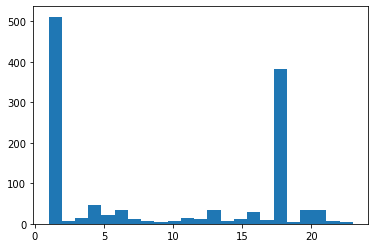

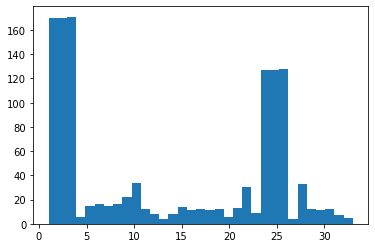

In [7]:
plt.figure()
# num_1, _, _ = plt.hist(df_1['Partition_ID'],bins=np.arange(1,num_cols_1+1,1))
num_1, _, _ = plt.hist(df_1['Partition_ID'],bins=23)
# plt.xticks(np.arange(1,num_cols_1+1,1))
print(num_1)
plt.figure()
# num_2, _, _ = plt.hist(df_2['Partition_ID'],bins=np.arange(1,num_cols_2+1,1))
num_2, _, _ = plt.hist(df_2['Partition_ID'],bins=33)
print(num_2)

In [8]:
np.sort(num_1)

array([  4.,   4.,   5.,   6.,   6.,   7.,   8.,   8.,   9.,  11.,  12.,
        13.,  14.,  15.,  22.,  30.,  33.,  34.,  35.,  35.,  47., 382.,
       511.])

In [31]:
len(num_2)

33

In [9]:
np.sort(num_2)

array([  4.,   4.,   5.,   6.,   6.,   7.,   8.,   8.,   9.,  11.,  11.,
        11.,  12.,  12.,  12.,  12.,  12.,  13.,  14.,  15.,  15.,  16.,
        16.,  22.,  30.,  33.,  34., 127., 127., 128., 170., 170., 171.])

In [10]:
np.argsort(num_2)

array([26, 12, 32,  3, 19, 31, 11, 13, 22, 29, 17, 15, 30, 28, 18, 16, 10,
       20, 14,  6,  4,  7,  5,  8, 21, 27,  9, 24, 23, 25,  1,  0,  2],
      dtype=int64)

In [11]:
1,2,3,24,26

(1, 2, 3, 24, 26)

In [12]:
print(np.median(num_1))
print(np.median(num_2))

13.0
12.0


Design a mechahism to find collaborators to be excluded permanently

In [13]:
def find_exclusion(num, threshold=10):
    small_cols = np.argwhere(num<=threshold)
    exclusion = []
    for i in small_cols:
        exclusion.append('col_'+str(i[-1]))
        # print('col_'+str(i[-1]))
    return exclusion

In [14]:
excl_1 = find_exclusion(num_1, 10)
excl_2 = find_exclusion(num_2, 10)
print(excl_1)
print(excl_2)

['col_1', 'col_7', 'col_8', 'col_9', 'col_13', 'col_16', 'col_18', 'col_21', 'col_22']
['col_3', 'col_11', 'col_12', 'col_13', 'col_19', 'col_22', 'col_26', 'col_31', 'col_32']


In [15]:
print(np.argsort(num_1))
print(np.argsort(num_2))

[18  8 22  1 13 21  9  7 16 11  6 14 10  2  4 15 19  5 12 20  3 17  0]
[26 12 32  3 19 31 11 13 22 29 17 15 30 28 18 16 10 20 14  6  4  7  5  8
 21 27  9 24 23 25  1  0  2]


In [16]:
def remove_col(all_cols, exclusion_list):
    for col in exclusion_list:
        all_cols.remove(col)

In [17]:
# remove_col(all_cols_1, excl_1)
# remove_col(all_cols_2, excl_2)
# print(all_cols_1)
# print(all_cols_2)

Find collaborators to be preserved

In [18]:
def find_preserved(num, threshold=10):
    big_cols = np.argwhere(num>=threshold)
    preserved_col_id = []
    for i in big_cols:
        preserved_col_id.append(int(i[-1]))
        # print('col_'+str(i[-1]))
    return preserved_col_id

In [19]:
preservation_1 = find_preserved(num_1, 10)
preservation_2 = find_preserved(num_2, 10)
print(preservation_1)
print(preservation_2)

[0, 2, 3, 4, 5, 6, 10, 11, 12, 14, 15, 17, 19, 20]
[0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 14, 15, 16, 17, 18, 20, 21, 23, 24, 25, 27, 28, 29, 30]


In [20]:
len(preservation_2)

24

In [21]:
preserved_col_1 = [all_cols_1[i] for i in preservation_1]
preserved_col_2 = [all_cols_2[i] for i in preservation_2]
print(preserved_col_1)
print(preserved_col_2)

['col_0', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_10', 'col_11', 'col_12', 'col_14', 'col_15', 'col_17', 'col_19', 'col_20']
['col_0', 'col_1', 'col_2', 'col_4', 'col_5', 'col_6', 'col_7', 'col_8', 'col_9', 'col_10', 'col_14', 'col_15', 'col_16', 'col_17', 'col_18', 'col_20', 'col_21', 'col_23', 'col_24', 'col_25', 'col_27', 'col_28', 'col_29', 'col_30']


Use the number of training sample as the basis of probability to be selected, then pick a subset of collaborators from the preserved ones randomly

In [22]:
prob_of_select_1 = np.array([num_1[i] for i in preservation_1])
prob_of_select_1 = prob_of_select_1/prob_of_select_1.sum()
print(prob_of_select_1)
prob_of_select_2 = np.array([num_2[i] for i in preservation_2])
prob_of_select_2 = prob_of_select_2/prob_of_select_2.sum()
print(prob_of_select_2)

[0.4279732  0.01256281 0.03936348 0.01842546 0.02847571 0.01005025
 0.01172529 0.00921273 0.02931323 0.01088777 0.02512563 0.319933
 0.02763819 0.02931323]
[0.14237856 0.14237856 0.14321608 0.01256281 0.01340034 0.01256281
 0.01340034 0.01842546 0.02847571 0.01005025 0.01172529 0.00921273
 0.01005025 0.00921273 0.01005025 0.01088777 0.02512563 0.10636516
 0.10636516 0.10720268 0.02763819 0.01005025 0.00921273 0.01005025]


In [32]:
len(prob_of_select_2)

24

In [24]:
rng = np.random.default_rng(66)
num_final_pick = 10
randmoly_picked_1 = rng.choice(preservation_1, num_final_pick, replace=False, p=prob_of_select_1)
randmoly_picked_2 = rng.choice(preservation_2, num_final_pick, replace=False, p=prob_of_select_2)
print(randmoly_picked_1)
print(randmoly_picked_2)

[17  0  3  2 19 12  5 10  4  6]
[ 7  1 23 16  0 25 24  2  6 20]


Manually created a partition csv file by keep the entries of these collaborators: 18,  1,  4, 20, 13,  5,  6, 11, 12, 16, the other entries are deleted, which results to about 1/3 data reduction 

In [25]:
for i in randmoly_picked_1:
    print(num_1[i])

382.0
511.0
47.0
15.0
33.0
35.0
34.0
14.0
22.0
12.0


In [26]:
randmoly_picked_5 = rng.choice(preservation_1, 5, replace=False, p=prob_of_select_1)
print(randmoly_picked_5)

[19 17  4  3 12]


In [27]:
for i in randmoly_picked_5:
    print(num_1[i])

33.0
382.0
22.0
47.0
35.0


In [33]:
# # preservation_2.remove(0)
# print(preservation_2)

In [34]:
# prob_2 = prob_of_select_2.tolist()
# prob_2.remove(prob_2[0])
# print(prob_2, len(prob_2))

In [35]:
randmoly_picked_5 = rng.choice(preservation_2, 5, replace=False, p=prob_of_select_2)
print(randmoly_picked_5+1)
for i in randmoly_picked_5:
    print(num_2[i])

[26  9  2  1 30]
128.0
22.0
170.0
170.0
11.0


Manually created a partition csv file by keep the entries of these collaborators: 25, 3, 24, 10, 26, the other entries are deleted, which results to about 587/1251 data 